In [ ]:
# !pip3 install pandas
# !pip3 install numpy
# !pip3 install matplotlib
# !pip3 install seaborn 
# !pip3 install -U scikit-learn
# !pip3 install xgboost

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('prices.txt', sep=',')
df.head()

,Date,Price
0,2/21/2017,55.478001
1,2/22/2017,54.702000
2,2/23/2017,51.198002
3,2/24/2017,51.400002
4,2/27/2017,49.245998


In [4]:
df = df.set_index("Date")
df.index = pd.to_datetime(df.index)

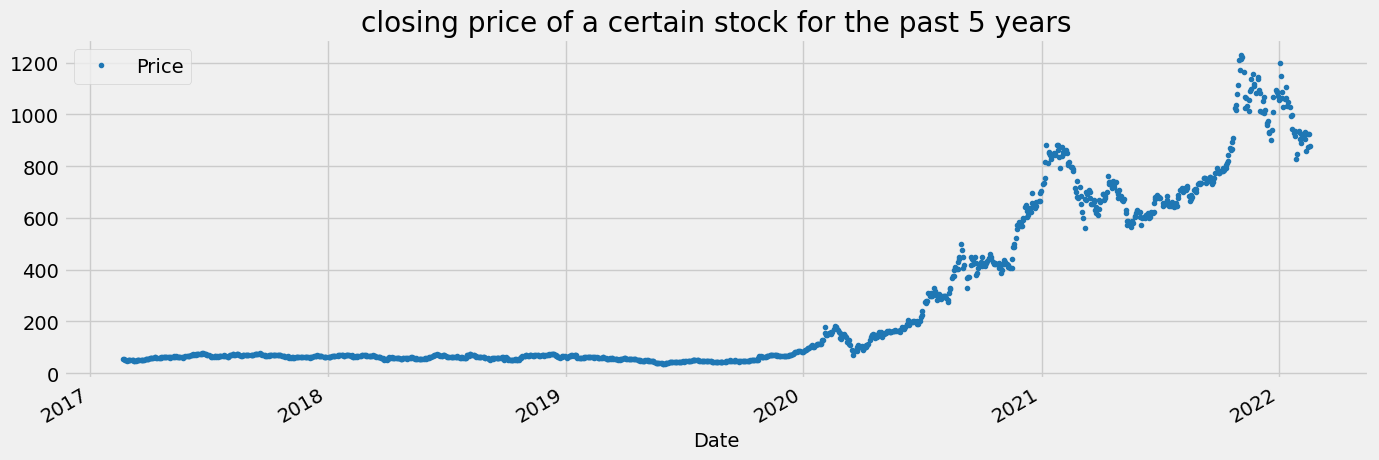

In [5]:
df.plot(style='.', figsize=(15, 5),
        color=color_pal[0],
        title="closing price of a certain stock for the past 5 years")
plt.show()

ConversionError: Failed to convert value(s) to axis units: array([Timestamp('2017-02-21 00:00:00'), Timestamp('2017-02-22 00:00:00'),
       Timestamp('2017-02-23 00:00:00'), Timestamp('2017-02-24 00:00:00'),
       Timestamp('2017-02-27 00:00:00'), Timestamp('2017-02-28 00:00:00'),
       Timestamp('2017-03-01 00:00:00'), Timestamp('2017-03-02 00:00:00'),
       Timestamp('2017-03-03 00:00:00'), Timestamp('2017-03-06 00:00:00'),
       Timestamp('2017-03-07 00:00:00'), Timestamp('2017-03-08 00:00:00'),
       Timestamp('2017-03-09 00:00:00'), Timestamp('2017-03-10 00:00:00'),
       Timestamp('2017-03-13 00:00:00'), Timestamp('2017-03-14 00:00:00'),
       Timestamp('2017-03-15 00:00:00'), Timestamp('2017-03-16 00:00:00'),
       Timestamp('2017-03-17 00:00:00'), Timestamp('2017-03-20 00:00:00'),
       Timestamp('2017-03-21 00:00:00'), Timestamp('2017-03-22 00:00:00'),
       Timestamp('2017-03-23 00:00:00'), Timestamp('2017-03-24 00:00:00'),
       Timestamp('2017-03-27 00:00:00'), Timestamp('2017-03-28 00:00:00'),
       Timestamp('2017-03-29 00:00:00'), Timestamp('2017-03-30 00:00:00'),
       Timestamp('2017-03-31 00:00:00'), Timestamp('2017-04-03 00:00:00'),
       Timestamp('2017-04-04 00:00:00'), Timestamp('2017-04-05 00:00:00'),
       Timestamp('2017-04-06 00:00:00'), Timestamp('2017-04-07 00:00:00'),
       Timestamp('2017-04-10 00:00:00'), Timestamp('2017-04-11 00:00:00'),
       Timestamp('2017-04-12 00:00:00'), Timestamp('2017-04-13 00:00:00'),
       Timestamp('2017-04-17 00:00:00'), Timestamp('2017-04-18 00:00:00'),
       Timestamp('2017-04-19 00:00:00'), Timestamp('2017-04-20 00:00:00'),
       Timestamp('2017-04-21 00:00:00'), Timestamp('2017-04-24 00:00:00'),
       Timestamp('2017-04-25 00:00:00'), Timestamp('2017-04-26 00:00:00'),
       Timestamp('2017-04-27 00:00:00'), Timestamp('2017-04-28 00:00:00'),
       Timestamp('2017-05-01 00:00:00'), Timestamp('2017-05-02 00:00:00'),
       Timestamp('2017-05-03 00:00:00'), Timestamp('2017-05-04 00:00:00'),
       Timestamp('2017-05-05 00:00:00'), Timestamp('2017-05-08 00:00:00'),
       Timestamp('2017-05-09 00:00:00'), Timestamp('2017-05-10 00:00:00'),
       Timestamp('2017-05-11 00:00:00'), Timestamp('2017-05-12 00:00:00'),
       Timestamp('2017-05-15 00:00:00'), Timestamp('2017-05-16 00:00:00'),
       Timestamp('2017-05-17 00:00:00'), Timestamp('2017-05-18 00:00:00'),
       Timestamp('2017-05-19 00:00:00'), Timestamp('2017-05-22 00:00:00'),
       Timestamp('2017-05-23 00:00:00'), Timestamp('2017-05-24 00:00:00'),
       Timestamp('2017-05-25 00:00:00'), Timestamp('2017-05-26 00:00:00'),
       Timestamp('2017-05-30 00:00:00'), Timestamp('2017-05-31 00:00:00'),
       Timestamp('2017-06-01 00:00:00'), Timestamp('2017-06-02 00:00:00'),
       Timestamp('2017-06-05 00:00:00'), Timestamp('2017-06-06 00:00:00'),
       Timestamp('2017-06-07 00:00:00'), Timestamp('2017-06-08 00:00:00'),
       Timestamp('2017-06-09 00:00:00'), Timestamp('2017-06-12 00:00:00'),
       Timestamp('2017-06-13 00:00:00'), Timestamp('2017-06-14 00:00:00'),
       Timestamp('2017-06-15 00:00:00'), Timestamp('2017-06-16 00:00:00'),
       Timestamp('2017-06-19 00:00:00'), Timestamp('2017-06-20 00:00:00'),
       Timestamp('2017-06-21 00:00:00'), Timestamp('2017-06-22 00:00:00'),
       Timestamp('2017-06-23 00:00:00'), Timestamp('2017-06-26 00:00:00'),
       Timestamp('2017-06-27 00:00:00'), Timestamp('2017-06-28 00:00:00'),
       Timestamp('2017-06-29 00:00:00'), Timestamp('2017-06-30 00:00:00'),
       Timestamp('2017-07-03 00:00:00'), Timestamp('2017-07-05 00:00:00'),
       Timestamp('2017-07-06 00:00:00'), Timestamp('2017-07-07 00:00:00'),
       Timestamp('2017-07-10 00:00:00'), Timestamp('2017-07-11 00:00:00'),
       Timestamp('2017-07-12 00:00:00'), Timestamp('2017-07-13 00:00:00'),
       Timestamp('2017-07-14 00:00:00'), Timestamp('2017-07-17 00:00:00'),
       Timestamp('2017-07-18 00:00:00'), Timestamp('2017-07-19 00:00:00'),
       Timestamp('2017-07-20 00:00:00'), Timestamp('2017-07-21 00:00:00'),
       Timestamp('2017-07-24 00:00:00'), Timestamp('2017-07-25 00:00:00'),
       Timestamp('2017-07-26 00:00:00'), Timestamp('2017-07-27 00:00:00'),
       Timestamp('2017-07-28 00:00:00'), Timestamp('2017-07-31 00:00:00'),
       Timestamp('2017-08-01 00:00:00'), Timestamp('2017-08-02 00:00:00'),
       Timestamp('2017-08-03 00:00:00'), Timestamp('2017-08-04 00:00:00'),
       Timestamp('2017-08-07 00:00:00'), Timestamp('2017-08-08 00:00:00'),
       Timestamp('2017-08-09 00:00:00'), Timestamp('2017-08-10 00:00:00'),
       Timestamp('2017-08-11 00:00:00'), Timestamp('2017-08-14 00:00:00'),
       Timestamp('2017-08-15 00:00:00'), Timestamp('2017-08-16 00:00:00'),
       Timestamp('2017-08-17 00:00:00'), Timestamp('2017-08-18 00:00:00'),
       Timestamp('2017-08-21 00:00:00'), Timestamp('2017-08-22 00:00:00'),
       Timestamp('2017-08-23 00:00:00'), Timestamp('2017-08-24 00:00:00'),
       Timestamp('2017-08-25 00:00:00'), Timestamp('2017-08-28 00:00:00'),
       Timestamp('2017-08-29 00:00:00'), Timestamp('2017-08-30 00:00:00'),
       Timestamp('2017-08-31 00:00:00'), Timestamp('2017-09-01 00:00:00'),
       Timestamp('2017-09-05 00:00:00'), Timestamp('2017-09-06 00:00:00'),
       Timestamp('2017-09-07 00:00:00'), Timestamp('2017-09-08 00:00:00'),
       Timestamp('2017-09-11 00:00:00'), Timestamp('2017-09-12 00:00:00'),
       Timestamp('2017-09-13 00:00:00'), Timestamp('2017-09-14 00:00:00'),
       Timestamp('2017-09-15 00:00:00'), Timestamp('2017-09-18 00:00:00'),
       Timestamp('2017-09-19 00:00:00'), Timestamp('2017-09-20 00:00:00'),
       Timestamp('2017-09-21 00:00:00'), Timestamp('2017-09-22 00:00:00'),
       Timestamp('2017-09-25 00:00:00'), Timestamp('2017-09-26 00:00:00'),
       Timestamp('2017-09-27 00:00:00'), Timestamp('2017-09-28 00:00:00'),
       Timestamp('2017-09-29 00:00:00'), Timestamp('2017-10-02 00:00:00'),
       Timestamp('2017-10-03 00:00:00'), Timestamp('2017-10-04 00:00:00'),
       Timestamp('2017-10-05 00:00:00'), Timestamp('2017-10-06 00:00:00'),
       Timestamp('2017-10-09 00:00:00'), Timestamp('2017-10-10 00:00:00'),
       Timestamp('2017-10-11 00:00:00'), Timestamp('2017-10-12 00:00:00'),
       Timestamp('2017-10-13 00:00:00'), Timestamp('2017-10-16 00:00:00'),
       Timestamp('2017-10-17 00:00:00'), Timestamp('2017-10-18 00:00:00'),
       Timestamp('2017-10-19 00:00:00'), Timestamp('2017-10-20 00:00:00'),
       Timestamp('2017-10-23 00:00:00'), Timestamp('2017-10-24 00:00:00'),
       Timestamp('2017-10-25 00:00:00'), Timestamp('2017-10-26 00:00:00'),
       Timestamp('2017-10-27 00:00:00'), Timestamp('2017-10-30 00:00:00'),
       Timestamp('2017-10-31 00:00:00'), Timestamp('2017-11-01 00:00:00'),
       Timestamp('2017-11-02 00:00:00'), Timestamp('2017-11-03 00:00:00'),
       Timestamp('2017-11-06 00:00:00'), Timestamp('2017-11-07 00:00:00'),
       Timestamp('2017-11-08 00:00:00'), Timestamp('2017-11-09 00:00:00'),
       Timestamp('2017-11-10 00:00:00'), Timestamp('2017-11-13 00:00:00'),
       Timestamp('2017-11-14 00:00:00'), Timestamp('2017-11-15 00:00:00'),
       Timestamp('2017-11-16 00:00:00'), Timestamp('2017-11-17 00:00:00'),
       Timestamp('2017-11-20 00:00:00'), Timestamp('2017-11-21 00:00:00'),
       Timestamp('2017-11-22 00:00:00'), Timestamp('2017-11-24 00:00:00'),
       Timestamp('2017-11-27 00:00:00'), Timestamp('2017-11-28 00:00:00'),
       Timestamp('2017-11-29 00:00:00'), Timestamp('2017-11-30 00:00:00'),
       Timestamp('2017-12-01 00:00:00'), Timestamp('2017-12-04 00:00:00'),
       Timestamp('2017-12-05 00:00:00'), Timestamp('2017-12-06 00:00:00'),
       Timestamp('2017-12-07 00:00:00'), Timestamp('2017-12-08 00:00:00'),
       Timestamp('2017-12-11 00:00:00'), Timestamp('2017-12-12 00:00:00'),
       Timestamp('2017-12-13 00:00:00'), Timestamp('2017-12-14 00:00:00'),
       Timestamp('2017-12-15 00:00:00'), Timestamp('2017-12-18 00:00:00'),
       Timestamp('2017-12-19 00:00:00'), Timestamp('2017-12-20 00:00:00'),
       Timestamp('2017-12-21 00:00:00'), Timestamp('2017-12-22 00:00:00'),
       Timestamp('2017-12-26 00:00:00'), Timestamp('2017-12-27 00:00:00'),
       Timestamp('2017-12-28 00:00:00'), Timestamp('2017-12-29 00:00:00'),
       Timestamp('2018-01-02 00:00:00'), Timestamp('2018-01-03 00:00:00'),
       Timestamp('2018-01-04 00:00:00'), Timestamp('2018-01-05 00:00:00'),
       Timestamp('2018-01-08 00:00:00'), Timestamp('2018-01-09 00:00:00'),
       Timestamp('2018-01-10 00:00:00'), Timestamp('2018-01-11 00:00:00'),
       Timestamp('2018-01-12 00:00:00'), Timestamp('2018-01-16 00:00:00'),
       Timestamp('2018-01-17 00:00:00'), Timestamp('2018-01-18 00:00:00'),
       Timestamp('2018-01-19 00:00:00'), Timestamp('2018-01-22 00:00:00'),
       Timestamp('2018-01-23 00:00:00'), Timestamp('2018-01-24 00:00:00'),
       Timestamp('2018-01-25 00:00:00'), Timestamp('2018-01-26 00:00:00'),
       Timestamp('2018-01-29 00:00:00'), Timestamp('2018-01-30 00:00:00'),
       Timestamp('2018-01-31 00:00:00'), Timestamp('2018-02-01 00:00:00'),
       Timestamp('2018-02-02 00:00:00'), Timestamp('2018-02-05 00:00:00'),
       Timestamp('2018-02-06 00:00:00'), Timestamp('2018-02-07 00:00:00'),
       Timestamp('2018-02-08 00:00:00'), Timestamp('2018-02-09 00:00:00'),
       Timestamp('2018-02-12 00:00:00'), Timestamp('2018-02-13 00:00:00'),
       Timestamp('2018-02-14 00:00:00'), Timestamp('2018-02-15 00:00:00'),
       Timestamp('2018-02-16 00:00:00'), Timestamp('2018-02-20 00:00:00'),
       Timestamp('2018-02-21 00:00:00'), Timestamp('2018-02-22 00:00:00'),
       Timestamp('2018-02-23 00:00:00'), Timestamp('2018-02-26 00:00:00'),
       Timestamp('2018-02-27 00:00:00'), Timestamp('2018-02-28 00:00:00'),
       Timestamp('2018-03-01 00:00:00'), Timestamp('2018-03-02 00:00:00'),
       Timestamp('2018-03-05 00:00:00'), Timestamp('2018-03-06 00:00:00'),
       Timestamp('2018-03-07 00:00:00'), Timestamp('2018-03-08 00:00:00'),
       Timestamp('2018-03-09 00:00:00'), Timestamp('2018-03-12 00:00:00'),
       Timestamp('2018-03-13 00:00:00'), Timestamp('2018-03-14 00:00:00'),
       Timestamp('2018-03-15 00:00:00'), Timestamp('2018-03-16 00:00:00'),
       Timestamp('2018-03-19 00:00:00'), Timestamp('2018-03-20 00:00:00'),
       Timestamp('2018-03-21 00:00:00'), Timestamp('2018-03-22 00:00:00'),
       Timestamp('2018-03-23 00:00:00'), Timestamp('2018-03-26 00:00:00'),
       Timestamp('2018-03-27 00:00:00'), Timestamp('2018-03-28 00:00:00'),
       Timestamp('2018-03-29 00:00:00'), Timestamp('2018-04-02 00:00:00'),
       Timestamp('2018-04-03 00:00:00'), Timestamp('2018-04-04 00:00:00'),
       Timestamp('2018-04-05 00:00:00'), Timestamp('2018-04-06 00:00:00'),
       Timestamp('2018-04-09 00:00:00'), Timestamp('2018-04-10 00:00:00'),
       Timestamp('2018-04-11 00:00:00'), Timestamp('2018-04-12 00:00:00'),
       Timestamp('2018-04-13 00:00:00'), Timestamp('2018-04-16 00:00:00'),
       Timestamp('2018-04-17 00:00:00'), Timestamp('2018-04-18 00:00:00'),
       Timestamp('2018-04-19 00:00:00'), Timestamp('2018-04-20 00:00:00'),
       Timestamp('2018-04-23 00:00:00'), Timestamp('2018-04-24 00:00:00'),
       Timestamp('2018-04-25 00:00:00'), Timestamp('2018-04-26 00:00:00'),
       Timestamp('2018-04-27 00:00:00'), Timestamp('2018-04-30 00:00:00'),
       Timestamp('2018-05-01 00:00:00'), Timestamp('2018-05-02 00:00:00'),
       Timestamp('2018-05-03 00:00:00'), Timestamp('2018-05-04 00:00:00'),
       Timestamp('2018-05-07 00:00:00'), Timestamp('2018-05-08 00:00:00'),
       Timestamp('2018-05-09 00:00:00'), Timestamp('2018-05-10 00:00:00'),
       Timestamp('2018-05-11 00:00:00'), Timestamp('2018-05-14 00:00:00'),
       Timestamp('2018-05-15 00:00:00'), Timestamp('2018-05-16 00:00:00'),
       Timestamp('2018-05-17 00:00:00'), Timestamp('2018-05-18 00:00:00'),
       Timestamp('2018-05-21 00:00:00'), Timestamp('2018-05-22 00:00:00'),
       Timestamp('2018-05-23 00:00:00'), Timestamp('2018-05-24 00:00:00'),
       Timestamp('2018-05-25 00:00:00'), Timestamp('2018-05-29 00:00:00'),
       Timestamp('2018-05-30 00:00:00'), Timestamp('2018-05-31 00:00:00'),
       Timestamp('2018-06-01 00:00:00'), Timestamp('2018-06-04 00:00:00'),
       Timestamp('2018-06-05 00:00:00'), Timestamp('2018-06-06 00:00:00'),
       Timestamp('2018-06-07 00:00:00'), Timestamp('2018-06-08 00:00:00'),
       Timestamp('2018-06-11 00:00:00'), Timestamp('2018-06-12 00:00:00'),
       Timestamp('2018-06-13 00:00:00'), Timestamp('2018-06-14 00:00:00'),
       Timestamp('2018-06-15 00:00:00'), Timestamp('2018-06-18 00:00:00'),
       Timestamp('2018-06-19 00:00:00'), Timestamp('2018-06-20 00:00:00'),
       Timestamp('2018-06-21 00:00:00'), Timestamp('2018-06-22 00:00:00'),
       Timestamp('2018-06-25 00:00:00'), Timestamp('2018-06-26 00:00:00'),
       Timestamp('2018-06-27 00:00:00'), Timestamp('2018-06-28 00:00:00'),
       Timestamp('2018-06-29 00:00:00'), Timestamp('2018-07-02 00:00:00'),
       Timestamp('2018-07-03 00:00:00'), Timestamp('2018-07-05 00:00:00'),
       Timestamp('2018-07-06 00:00:00'), Timestamp('2018-07-09 00:00:00'),
       Timestamp('2018-07-10 00:00:00'), Timestamp('2018-07-11 00:00:00'),
       Timestamp('2018-07-12 00:00:00'), Timestamp('2018-07-13 00:00:00'),
       Timestamp('2018-07-16 00:00:00'), Timestamp('2018-07-17 00:00:00'),
       Timestamp('2018-07-18 00:00:00'), Timestamp('2018-07-19 00:00:00'),
       Timestamp('2018-07-20 00:00:00'), Timestamp('2018-07-23 00:00:00'),
       Timestamp('2018-07-24 00:00:00'), Timestamp('2018-07-25 00:00:00'),
       Timestamp('2018-07-26 00:00:00'), Timestamp('2018-07-27 00:00:00'),
       Timestamp('2018-07-30 00:00:00'), Timestamp('2018-07-31 00:00:00'),
       Timestamp('2018-08-01 00:00:00'), Timestamp('2018-08-02 00:00:00'),
       Timestamp('2018-08-03 00:00:00'), Timestamp('2018-08-06 00:00:00'),
       Timestamp('2018-08-07 00:00:00'), Timestamp('2018-08-08 00:00:00'),
       Timestamp('2018-08-09 00:00:00'), Timestamp('2018-08-10 00:00:00'),
       Timestamp('2018-08-13 00:00:00'), Timestamp('2018-08-14 00:00:00'),
       Timestamp('2018-08-15 00:00:00'), Timestamp('2018-08-16 00:00:00'),
       Timestamp('2018-08-17 00:00:00'), Timestamp('2018-08-20 00:00:00'),
       Timestamp('2018-08-21 00:00:00'), Timestamp('2018-08-22 00:00:00'),
       Timestamp('2018-08-23 00:00:00'), Timestamp('2018-08-24 00:00:00'),
       Timestamp('2018-08-27 00:00:00'), Timestamp('2018-08-28 00:00:00'),
       Timestamp('2018-08-29 00:00:00'), Timestamp('2018-08-30 00:00:00'),
       Timestamp('2018-08-31 00:00:00'), Timestamp('2018-09-04 00:00:00'),
       Timestamp('2018-09-05 00:00:00'), Timestamp('2018-09-06 00:00:00'),
       Timestamp('2018-09-07 00:00:00'), Timestamp('2018-09-10 00:00:00'),
       Timestamp('2018-09-11 00:00:00'), Timestamp('2018-09-12 00:00:00'),
       Timestamp('2018-09-13 00:00:00'), Timestamp('2018-09-14 00:00:00'),
       Timestamp('2018-09-17 00:00:00'), Timestamp('2018-09-18 00:00:00'),
       Timestamp('2018-09-19 00:00:00'), Timestamp('2018-09-20 00:00:00'),
       Timestamp('2018-09-21 00:00:00'), Timestamp('2018-09-24 00:00:00'),
       Timestamp('2018-09-25 00:00:00'), Timestamp('2018-09-26 00:00:00'),
       Timestamp('2018-09-27 00:00:00'), Timestamp('2018-09-28 00:00:00'),
       Timestamp('2018-10-01 00:00:00'), Timestamp('2018-10-02 00:00:00'),
       Timestamp('2018-10-03 00:00:00'), Timestamp('2018-10-04 00:00:00'),
       Timestamp('2018-10-05 00:00:00'), Timestamp('2018-10-08 00:00:00'),
       Timestamp('2018-10-09 00:00:00'), Timestamp('2018-10-10 00:00:00'),
       Timestamp('2018-10-11 00:00:00'), Timestamp('2018-10-12 00:00:00'),
       Timestamp('2018-10-15 00:00:00'), Timestamp('2018-10-16 00:00:00'),
       Timestamp('2018-10-17 00:00:00'), Timestamp('2018-10-18 00:00:00'),
       Timestamp('2018-10-19 00:00:00'), Timestamp('2018-10-22 00:00:00'),
       Timestamp('2018-10-23 00:00:00'), Timestamp('2018-10-24 00:00:00'),
       Timestamp('2018-10-25 00:00:00'), Timestamp('2018-10-26 00:00:00'),
       Timestamp('2018-10-29 00:00:00'), Timestamp('2018-10-30 00:00:00'),
       Timestamp('2018-10-31 00:00:00'), Timestamp('2018-11-01 00:00:00'),
       Timestamp('2018-11-02 00:00:00'), Timestamp('2018-11-05 00:00:00'),
       Timestamp('2018-11-06 00:00:00'), Timestamp('2018-11-07 00:00:00'),
       Timestamp('2018-11-08 00:00:00'), Timestamp('2018-11-09 00:00:00'),
       Timestamp('2018-11-12 00:00:00'), Timestamp('2018-11-13 00:00:00'),
       Timestamp('2018-11-14 00:00:00'), Timestamp('2018-11-15 00:00:00'),
       Timestamp('2018-11-16 00:00:00'), Timestamp('2018-11-19 00:00:00'),
       Timestamp('2018-11-20 00:00:00'), Timestamp('2018-11-21 00:00:00'),
       Timestamp('2018-11-23 00:00:00'), Timestamp('2018-11-26 00:00:00'),
       Timestamp('2018-11-27 00:00:00'), Timestamp('2018-11-28 00:00:00'),
       Timestamp('2018-11-29 00:00:00'), Timestamp('2018-11-30 00:00:00'),
       Timestamp('2018-12-03 00:00:00'), Timestamp('2018-12-04 00:00:00'),
       Timestamp('2018-12-06 00:00:00'), Timestamp('2018-12-07 00:00:00'),
       Timestamp('2018-12-10 00:00:00'), Timestamp('2018-12-11 00:00:00'),
       Timestamp('2018-12-12 00:00:00'), Timestamp('2018-12-13 00:00:00'),
       Timestamp('2018-12-14 00:00:00'), Timestamp('2018-12-17 00:00:00'),
       Timestamp('2018-12-18 00:00:00'), Timestamp('2018-12-19 00:00:00'),
       Timestamp('2018-12-20 00:00:00'), Timestamp('2018-12-21 00:00:00'),
       Timestamp('2018-12-24 00:00:00'), Timestamp('2018-12-26 00:00:00'),
       Timestamp('2018-12-27 00:00:00'), Timestamp('2018-12-28 00:00:00'),
       Timestamp('2018-12-31 00:00:00'), Timestamp('2019-01-02 00:00:00'),
       Timestamp('2019-01-03 00:00:00'), Timestamp('2019-01-04 00:00:00'),
       Timestamp('2019-01-07 00:00:00'), Timestamp('2019-01-08 00:00:00'),
       Timestamp('2019-01-09 00:00:00'), Timestamp('2019-01-10 00:00:00'),
       Timestamp('2019-01-11 00:00:00'), Timestamp('2019-01-14 00:00:00'),
       Timestamp('2019-01-15 00:00:00'), Timestamp('2019-01-16 00:00:00'),
       Timestamp('2019-01-17 00:00:00'), Timestamp('2019-01-18 00:00:00'),
       Timestamp('2019-01-22 00:00:00'), Timestamp('2019-01-23 00:00:00'),
       Timestamp('2019-01-24 00:00:00'), Timestamp('2019-01-25 00:00:00'),
       Timestamp('2019-01-28 00:00:00'), Timestamp('2019-01-29 00:00:00'),
       Timestamp('2019-01-30 00:00:00'), Timestamp('2019-01-31 00:00:00'),
       Timestamp('2019-02-01 00:00:00'), Timestamp('2019-02-04 00:00:00'),
       Timestamp('2019-02-05 00:00:00'), Timestamp('2019-02-06 00:00:00'),
       Timestamp('2019-02-07 00:00:00'), Timestamp('2019-02-08 00:00:00'),
       Timestamp('2019-02-11 00:00:00'), Timestamp('2019-02-12 00:00:00'),
       Timestamp('2019-02-13 00:00:00'), Timestamp('2019-02-14 00:00:00'),
       Timestamp('2019-02-15 00:00:00'), Timestamp('2019-02-19 00:00:00'),
       Timestamp('2019-02-20 00:00:00'), Timestamp('2019-02-21 00:00:00'),
       Timestamp('2019-02-22 00:00:00'), Timestamp('2019-02-25 00:00:00'),
       Timestamp('2019-02-26 00:00:00'), Timestamp('2019-02-27 00:00:00'),
       Timestamp('2019-02-28 00:00:00'), Timestamp('2019-03-01 00:00:00'),
       Timestamp('2019-03-04 00:00:00'), Timestamp('2019-03-05 00:00:00'),
       Timestamp('2019-03-06 00:00:00'), Timestamp('2019-03-07 00:00:00'),
       Timestamp('2019-03-08 00:00:00'), Timestamp('2019-03-11 00:00:00'),
       Timestamp('2019-03-12 00:00:00'), Timestamp('2019-03-13 00:00:00'),
       Timestamp('2019-03-14 00:00:00'), Timestamp('2019-03-15 00:00:00'),
       Timestamp('2019-03-18 00:00:00'), Timestamp('2019-03-19 00:00:00'),
       Timestamp('2019-03-20 00:00:00'), Timestamp('2019-03-21 00:00:00'),
       Timestamp('2019-03-22 00:00:00'), Timestamp('2019-03-25 00:00:00'),
       Timestamp('2019-03-26 00:00:00'), Timestamp('2019-03-27 00:00:00'),
       Timestamp('2019-03-28 00:00:00'), Timestamp('2019-03-29 00:00:00'),
       Timestamp('2019-04-01 00:00:00'), Timestamp('2019-04-02 00:00:00'),
       Timestamp('2019-04-03 00:00:00'), Timestamp('2019-04-04 00:00:00'),
       Timestamp('2019-04-05 00:00:00'), Timestamp('2019-04-08 00:00:00'),
       Timestamp('2019-04-09 00:00:00'), Timestamp('2019-04-10 00:00:00'),
       Timestamp('2019-04-11 00:00:00'), Timestamp('2019-04-12 00:00:00'),
       Timestamp('2019-04-15 00:00:00'), Timestamp('2019-04-16 00:00:00'),
       Timestamp('2019-04-17 00:00:00'), Timestamp('2019-04-18 00:00:00'),
       Timestamp('2019-04-22 00:00:00'), Timestamp('2019-04-23 00:00:00'),
       Timestamp('2019-04-24 00:00:00'), Timestamp('2019-04-25 00:00:00'),
       Timestamp('2019-04-26 00:00:00'), Timestamp('2019-04-29 00:00:00'),
       Timestamp('2019-04-30 00:00:00'), Timestamp('2019-05-01 00:00:00'),
       Timestamp('2019-05-02 00:00:00'), Timestamp('2019-05-03 00:00:00'),
       Timestamp('2019-05-06 00:00:00'), Timestamp('2019-05-07 00:00:00'),
       Timestamp('2019-05-08 00:00:00'), Timestamp('2019-05-09 00:00:00'),
       Timestamp('2019-05-10 00:00:00'), Timestamp('2019-05-13 00:00:00'),
       Timestamp('2019-05-14 00:00:00'), Timestamp('2019-05-15 00:00:00'),
       Timestamp('2019-05-16 00:00:00'), Timestamp('2019-05-17 00:00:00'),
       Timestamp('2019-05-20 00:00:00'), Timestamp('2019-05-21 00:00:00'),
       Timestamp('2019-05-22 00:00:00'), Timestamp('2019-05-23 00:00:00'),
       Timestamp('2019-05-24 00:00:00'), Timestamp('2019-05-28 00:00:00'),
       Timestamp('2019-05-29 00:00:00'), Timestamp('2019-05-30 00:00:00'),
       Timestamp('2019-05-31 00:00:00'), Timestamp('2019-06-03 00:00:00'),
       Timestamp('2019-06-04 00:00:00'), Timestamp('2019-06-05 00:00:00'),
       Timestamp('2019-06-06 00:00:00'), Timestamp('2019-06-07 00:00:00'),
       Timestamp('2019-06-10 00:00:00'), Timestamp('2019-06-11 00:00:00'),
       Timestamp('2019-06-12 00:00:00'), Timestamp('2019-06-13 00:00:00'),
       Timestamp('2019-06-14 00:00:00'), Timestamp('2019-06-17 00:00:00'),
       Timestamp('2019-06-18 00:00:00'), Timestamp('2019-06-19 00:00:00'),
       Timestamp('2019-06-20 00:00:00'), Timestamp('2019-06-21 00:00:00'),
       Timestamp('2019-06-24 00:00:00'), Timestamp('2019-06-25 00:00:00'),
       Timestamp('2019-06-26 00:00:00'), Timestamp('2019-06-27 00:00:00'),
       Timestamp('2019-06-28 00:00:00'), Timestamp('2019-07-01 00:00:00'),
       Timestamp('2019-07-02 00:00:00'), Timestamp('2019-07-03 00:00:00'),
       Timestamp('2019-07-05 00:00:00'), Timestamp('2019-07-08 00:00:00'),
       Timestamp('2019-07-09 00:00:00'), Timestamp('2019-07-10 00:00:00'),
       Timestamp('2019-07-11 00:00:00'), Timestamp('2019-07-12 00:00:00'),
       Timestamp('2019-07-15 00:00:00'), Timestamp('2019-07-16 00:00:00'),
       Timestamp('2019-07-17 00:00:00'), Timestamp('2019-07-18 00:00:00'),
       Timestamp('2019-07-19 00:00:00'), Timestamp('2019-07-22 00:00:00'),
       Timestamp('2019-07-23 00:00:00'), Timestamp('2019-07-24 00:00:00'),
       Timestamp('2019-07-25 00:00:00'), Timestamp('2019-07-26 00:00:00'),
       Timestamp('2019-07-29 00:00:00'), Timestamp('2019-07-30 00:00:00'),
       Timestamp('2019-07-31 00:00:00'), Timestamp('2019-08-01 00:00:00'),
       Timestamp('2019-08-02 00:00:00'), Timestamp('2019-08-05 00:00:00'),
       Timestamp('2019-08-06 00:00:00'), Timestamp('2019-08-07 00:00:00'),
       Timestamp('2019-08-08 00:00:00'), Timestamp('2019-08-09 00:00:00'),
       Timestamp('2019-08-12 00:00:00'), Timestamp('2019-08-13 00:00:00'),
       Timestamp('2019-08-14 00:00:00'), Timestamp('2019-08-15 00:00:00'),
       Timestamp('2019-08-16 00:00:00'), Timestamp('2019-08-19 00:00:00'),
       Timestamp('2019-08-20 00:00:00'), Timestamp('2019-08-21 00:00:00'),
       Timestamp('2019-08-22 00:00:00'), Timestamp('2019-08-23 00:00:00'),
       Timestamp('2019-08-26 00:00:00'), Timestamp('2019-08-27 00:00:00'),
       Timestamp('2019-08-28 00:00:00'), Timestamp('2019-08-29 00:00:00'),
       Timestamp('2019-08-30 00:00:00'), Timestamp('2019-09-03 00:00:00'),
       Timestamp('2019-09-04 00:00:00'), Timestamp('2019-09-05 00:00:00'),
       Timestamp('2019-09-06 00:00:00'), Timestamp('2019-09-09 00:00:00'),
       Timestamp('2019-09-10 00:00:00'), Timestamp('2019-09-11 00:00:00'),
       Timestamp('2019-09-12 00:00:00'), Timestamp('2019-09-13 00:00:00'),
       Timestamp('2019-09-16 00:00:00'), Timestamp('2019-09-17 00:00:00'),
       Timestamp('2019-09-18 00:00:00'), Timestamp('2019-09-19 00:00:00'),
       Timestamp('2019-09-20 00:00:00'), Timestamp('2019-09-23 00:00:00'),
       Timestamp('2019-09-24 00:00:00'), Timestamp('2019-09-25 00:00:00'),
       Timestamp('2019-09-26 00:00:00'), Timestamp('2019-09-27 00:00:00'),
       Timestamp('2019-09-30 00:00:00'), Timestamp('2019-10-01 00:00:00'),
       Timestamp('2019-10-02 00:00:00'), Timestamp('2019-10-03 00:00:00'),
       Timestamp('2019-10-04 00:00:00'), Timestamp('2019-10-07 00:00:00'),
       Timestamp('2019-10-08 00:00:00'), Timestamp('2019-10-09 00:00:00'),
       Timestamp('2019-10-10 00:00:00'), Timestamp('2019-10-11 00:00:00'),
       Timestamp('2019-10-14 00:00:00'), Timestamp('2019-10-15 00:00:00'),
       Timestamp('2019-10-16 00:00:00'), Timestamp('2019-10-17 00:00:00'),
       Timestamp('2019-10-18 00:00:00'), Timestamp('2019-10-21 00:00:00'),
       Timestamp('2019-10-22 00:00:00'), Timestamp('2019-10-23 00:00:00'),
       Timestamp('2019-10-24 00:00:00'), Timestamp('2019-10-25 00:00:00'),
       Timestamp('2019-10-28 00:00:00'), Timestamp('2019-10-29 00:00:00'),
       Timestamp('2019-10-30 00:00:00'), Timestamp('2019-10-31 00:00:00'),
       Timestamp('2019-11-01 00:00:00'), Timestamp('2019-11-04 00:00:00'),
       Timestamp('2019-11-05 00:00:00'), Timestamp('2019-11-06 00:00:00'),
       Timestamp('2019-11-07 00:00:00'), Timestamp('2019-11-08 00:00:00'),
       Timestamp('2019-11-11 00:00:00'), Timestamp('2019-11-12 00:00:00'),
       Timestamp('2019-11-13 00:00:00'), Timestamp('2019-11-14 00:00:00'),
       Timestamp('2019-11-15 00:00:00'), Timestamp('2019-11-18 00:00:00'),
       Timestamp('2019-11-19 00:00:00'), Timestamp('2019-11-20 00:00:00'),
       Timestamp('2019-11-21 00:00:00'), Timestamp('2019-11-22 00:00:00'),
       Timestamp('2019-11-25 00:00:00'), Timestamp('2019-11-26 00:00:00'),
       Timestamp('2019-11-27 00:00:00'), Timestamp('2019-11-29 00:00:00'),
       Timestamp('2019-12-02 00:00:00'), Timestamp('2019-12-03 00:00:00'),
       Timestamp('2019-12-04 00:00:00'), Timestamp('2019-12-05 00:00:00'),
       Timestamp('2019-12-06 00:00:00'), Timestamp('2019-12-09 00:00:00'),
       Timestamp('2019-12-10 00:00:00'), Timestamp('2019-12-11 00:00:00'),
       Timestamp('2019-12-12 00:00:00'), Timestamp('2019-12-13 00:00:00'),
       Timestamp('2019-12-16 00:00:00'), Timestamp('2019-12-17 00:00:00'),
       Timestamp('2019-12-18 00:00:00'), Timestamp('2019-12-19 00:00:00'),
       Timestamp('2019-12-20 00:00:00'), Timestamp('2019-12-23 00:00:00'),
       Timestamp('2019-12-24 00:00:00'), Timestamp('2019-12-26 00:00:00'),
       Timestamp('2019-12-27 00:00:00'), Timestamp('2019-12-30 00:00:00'),
       Timestamp('2019-12-31 00:00:00'), Timestamp('2020-01-02 00:00:00'),
       Timestamp('2020-01-03 00:00:00'), Timestamp('2020-01-06 00:00:00'),
       Timestamp('2020-01-07 00:00:00'), Timestamp('2020-01-08 00:00:00'),
       Timestamp('2020-01-09 00:00:00'), Timestamp('2020-01-10 00:00:00'),
       Timestamp('2020-01-13 00:00:00'), Timestamp('2020-01-14 00:00:00'),
       Timestamp('2020-01-15 00:00:00'), Timestamp('2020-01-16 00:00:00'),
       Timestamp('2020-01-17 00:00:00'), Timestamp('2020-01-21 00:00:00'),
       Timestamp('2020-01-22 00:00:00'), Timestamp('2020-01-23 00:00:00'),
       Timestamp('2020-01-24 00:00:00'), Timestamp('2020-01-27 00:00:00'),
       Timestamp('2020-01-28 00:00:00'), Timestamp('2020-01-29 00:00:00'),
       Timestamp('2020-01-30 00:00:00'), Timestamp('2020-01-31 00:00:00'),
       Timestamp('2020-02-03 00:00:00'), Timestamp('2020-02-04 00:00:00'),
       Timestamp('2020-02-05 00:00:00'), Timestamp('2020-02-06 00:00:00'),
       Timestamp('2020-02-07 00:00:00'), Timestamp('2020-02-10 00:00:00'),
       Timestamp('2020-02-11 00:00:00'), Timestamp('2020-02-12 00:00:00'),
       Timestamp('2020-02-13 00:00:00'), Timestamp('2020-02-14 00:00:00'),
       Timestamp('2020-02-18 00:00:00'), Timestamp('2020-02-19 00:00:00'),
       Timestamp('2020-02-20 00:00:00'), Timestamp('2020-02-21 00:00:00'),
       Timestamp('2020-02-24 00:00:00'), Timestamp('2020-02-25 00:00:00'),
       Timestamp('2020-02-26 00:00:00'), Timestamp('2020-02-27 00:00:00'),
       Timestamp('2020-02-28 00:00:00'), Timestamp('2020-03-02 00:00:00'),
       Timestamp('2020-03-03 00:00:00'), Timestamp('2020-03-04 00:00:00'),
       Timestamp('2020-03-05 00:00:00'), Timestamp('2020-03-06 00:00:00'),
       Timestamp('2020-03-09 00:00:00'), Timestamp('2020-03-10 00:00:00'),
       Timestamp('2020-03-11 00:00:00'), Timestamp('2020-03-12 00:00:00'),
       Timestamp('2020-03-13 00:00:00'), Timestamp('2020-03-16 00:00:00'),
       Timestamp('2020-03-17 00:00:00'), Timestamp('2020-03-18 00:00:00'),
       Timestamp('2020-03-19 00:00:00'), Timestamp('2020-03-20 00:00:00'),
       Timestamp('2020-03-23 00:00:00'), Timestamp('2020-03-24 00:00:00'),
       Timestamp('2020-03-25 00:00:00'), Timestamp('2020-03-26 00:00:00'),
       Timestamp('2020-03-27 00:00:00'), Timestamp('2020-03-30 00:00:00'),
       Timestamp('2020-03-31 00:00:00'), Timestamp('2020-04-01 00:00:00'),
       Timestamp('2020-04-02 00:00:00'), Timestamp('2020-04-03 00:00:00'),
       Timestamp('2020-04-06 00:00:00'), Timestamp('2020-04-07 00:00:00'),
       Timestamp('2020-04-08 00:00:00'), Timestamp('2020-04-09 00:00:00'),
       Timestamp('2020-04-13 00:00:00'), Timestamp('2020-04-14 00:00:00'),
       Timestamp('2020-04-15 00:00:00'), Timestamp('2020-04-16 00:00:00'),
       Timestamp('2020-04-17 00:00:00'), Timestamp('2020-04-20 00:00:00'),
       Timestamp('2020-04-21 00:00:00'), Timestamp('2020-04-22 00:00:00'),
       Timestamp('2020-04-23 00:00:00'), Timestamp('2020-04-24 00:00:00'),
       Timestamp('2020-04-27 00:00:00'), Timestamp('2020-04-28 00:00:00'),
       Timestamp('2020-04-29 00:00:00'), Timestamp('2020-04-30 00:00:00'),
       Timestamp('2020-05-01 00:00:00'), Timestamp('2020-05-04 00:00:00'),
       Timestamp('2020-05-05 00:00:00'), Timestamp('2020-05-06 00:00:00'),
       Timestamp('2020-05-07 00:00:00'), Timestamp('2020-05-08 00:00:00'),
       Timestamp('2020-05-11 00:00:00'), Timestamp('2020-05-12 00:00:00'),
       Timestamp('2020-05-13 00:00:00'), Timestamp('2020-05-14 00:00:00'),
       Timestamp('2020-05-15 00:00:00'), Timestamp('2020-05-18 00:00:00'),
       Timestamp('2020-05-19 00:00:00'), Timestamp('2020-05-20 00:00:00'),
       Timestamp('2020-05-21 00:00:00'), Timestamp('2020-05-22 00:00:00'),
       Timestamp('2020-05-26 00:00:00'), Timestamp('2020-05-27 00:00:00'),
       Timestamp('2020-05-28 00:00:00'), Timestamp('2020-05-29 00:00:00'),
       Timestamp('2020-06-01 00:00:00'), Timestamp('2020-06-02 00:00:00'),
       Timestamp('2020-06-03 00:00:00'), Timestamp('2020-06-04 00:00:00'),
       Timestamp('2020-06-05 00:00:00'), Timestamp('2020-06-08 00:00:00'),
       Timestamp('2020-06-09 00:00:00'), Timestamp('2020-06-10 00:00:00'),
       Timestamp('2020-06-11 00:00:00'), Timestamp('2020-06-12 00:00:00'),
       Timestamp('2020-06-15 00:00:00'), Timestamp('2020-06-16 00:00:00'),
       Timestamp('2020-06-17 00:00:00'), Timestamp('2020-06-18 00:00:00'),
       Timestamp('2020-06-19 00:00:00'), Timestamp('2020-06-22 00:00:00'),
       Timestamp('2020-06-23 00:00:00'), Timestamp('2020-06-24 00:00:00'),
       Timestamp('2020-06-25 00:00:00'), Timestamp('2020-06-26 00:00:00'),
       Timestamp('2020-06-29 00:00:00'), Timestamp('2020-06-30 00:00:00'),
       Timestamp('2020-07-01 00:00:00'), Timestamp('2020-07-02 00:00:00'),
       Timestamp('2020-07-06 00:00:00'), Timestamp('2020-07-07 00:00:00'),
       Timestamp('2020-07-08 00:00:00'), Timestamp('2020-07-09 00:00:00'),
       Timestamp('2020-07-10 00:00:00'), Timestamp('2020-07-13 00:00:00'),
       Timestamp('2020-07-14 00:00:00'), Timestamp('2020-07-15 00:00:00'),
       Timestamp('2020-07-16 00:00:00'), Timestamp('2020-07-17 00:00:00'),
       Timestamp('2020-07-20 00:00:00'), Timestamp('2020-07-21 00:00:00'),
       Timestamp('2020-07-22 00:00:00'), Timestamp('2020-07-23 00:00:00'),
       Timestamp('2020-07-24 00:00:00'), Timestamp('2020-07-27 00:00:00'),
       Timestamp('2020-07-28 00:00:00'), Timestamp('2020-07-29 00:00:00'),
       Timestamp('2020-07-30 00:00:00'), Timestamp('2020-07-31 00:00:00'),
       Timestamp('2020-08-03 00:00:00'), Timestamp('2020-08-04 00:00:00'),
       Timestamp('2020-08-05 00:00:00'), Timestamp('2020-08-06 00:00:00'),
       Timestamp('2020-08-07 00:00:00'), Timestamp('2020-08-10 00:00:00'),
       Timestamp('2020-08-11 00:00:00'), Timestamp('2020-08-12 00:00:00'),
       Timestamp('2020-08-13 00:00:00'), Timestamp('2020-08-14 00:00:00'),
       Timestamp('2020-08-17 00:00:00'), Timestamp('2020-08-18 00:00:00'),
       Timestamp('2020-08-19 00:00:00'), Timestamp('2020-08-20 00:00:00'),
       Timestamp('2020-08-21 00:00:00'), Timestamp('2020-08-24 00:00:00'),
       Timestamp('2020-08-25 00:00:00'), Timestamp('2020-08-26 00:00:00'),
       Timestamp('2020-08-27 00:00:00'), Timestamp('2020-08-28 00:00:00'),
       Timestamp('2020-08-31 00:00:00'), Timestamp('2020-09-01 00:00:00'),
       Timestamp('2020-09-02 00:00:00'), Timestamp('2020-09-03 00:00:00'),
       Timestamp('2020-09-04 00:00:00'), Timestamp('2020-09-08 00:00:00'),
       Timestamp('2020-09-09 00:00:00'), Timestamp('2020-09-10 00:00:00'),
       Timestamp('2020-09-11 00:00:00'), Timestamp('2020-09-14 00:00:00'),
       Timestamp('2020-09-15 00:00:00'), Timestamp('2020-09-16 00:00:00'),
       Timestamp('2020-09-17 00:00:00'), Timestamp('2020-09-18 00:00:00'),
       Timestamp('2020-09-21 00:00:00'), Timestamp('2020-09-22 00:00:00'),
       Timestamp('2020-09-23 00:00:00'), Timestamp('2020-09-24 00:00:00'),
       Timestamp('2020-09-25 00:00:00'), Timestamp('2020-09-28 00:00:00'),
       Timestamp('2020-09-29 00:00:00'), Timestamp('2020-09-30 00:00:00'),
       Timestamp('2020-10-01 00:00:00'), Timestamp('2020-10-02 00:00:00'),
       Timestamp('2020-10-05 00:00:00'), Timestamp('2020-10-06 00:00:00'),
       Timestamp('2020-10-07 00:00:00'), Timestamp('2020-10-08 00:00:00'),
       Timestamp('2020-10-09 00:00:00'), Timestamp('2020-10-12 00:00:00'),
       Timestamp('2020-10-13 00:00:00'), Timestamp('2020-10-14 00:00:00'),
       Timestamp('2020-10-15 00:00:00'), Timestamp('2020-10-16 00:00:00'),
       Timestamp('2020-10-19 00:00:00'), Timestamp('2020-10-20 00:00:00'),
       Timestamp('2020-10-21 00:00:00'), Timestamp('2020-10-22 00:00:00'),
       Timestamp('2020-10-23 00:00:00'), Timestamp('2020-10-26 00:00:00'),
       Timestamp('2020-10-27 00:00:00'), Timestamp('2020-10-28 00:00:00'),
       Timestamp('2020-10-29 00:00:00'), Timestamp('2020-10-30 00:00:00'),
       Timestamp('2020-11-02 00:00:00'), Timestamp('2020-11-03 00:00:00'),
       Timestamp('2020-11-04 00:00:00'), Timestamp('2020-11-05 00:00:00'),
       Timestamp('2020-11-06 00:00:00'), Timestamp('2020-11-09 00:00:00'),
       Timestamp('2020-11-10 00:00:00'), Timestamp('2020-11-11 00:00:00'),
       Timestamp('2020-11-12 00:00:00'), Timestamp('2020-11-13 00:00:00'),
       Timestamp('2020-11-16 00:00:00'), Timestamp('2020-11-17 00:00:00'),
       Timestamp('2020-11-18 00:00:00'), Timestamp('2020-11-19 00:00:00'),
       Timestamp('2020-11-20 00:00:00'), Timestamp('2020-11-23 00:00:00'),
       Timestamp('2020-11-24 00:00:00'), Timestamp('2020-11-25 00:00:00'),
       Timestamp('2020-11-27 00:00:00'), Timestamp('2020-11-30 00:00:00'),
       Timestamp('2020-12-01 00:00:00'), Timestamp('2020-12-02 00:00:00'),
       Timestamp('2020-12-03 00:00:00'), Timestamp('2020-12-04 00:00:00'),
       Timestamp('2020-12-07 00:00:00'), Timestamp('2020-12-08 00:00:00'),
       Timestamp('2020-12-09 00:00:00'), Timestamp('2020-12-10 00:00:00'),
       Timestamp('2020-12-11 00:00:00'), Timestamp('2020-12-14 00:00:00'),
       Timestamp('2020-12-15 00:00:00'), Timestamp('2020-12-16 00:00:00'),
       Timestamp('2020-12-17 00:00:00'), Timestamp('2020-12-18 00:00:00'),
       Timestamp('2020-12-21 00:00:00'), Timestamp('2020-12-22 00:00:00'),
       Timestamp('2020-12-23 00:00:00'), Timestamp('2020-12-24 00:00:00'),
       Timestamp('2020-12-28 00:00:00'), Timestamp('2020-12-29 00:00:00'),
       Timestamp('2020-12-30 00:00:00'), Timestamp('2020-12-31 00:00:00')],
      dtype=object)

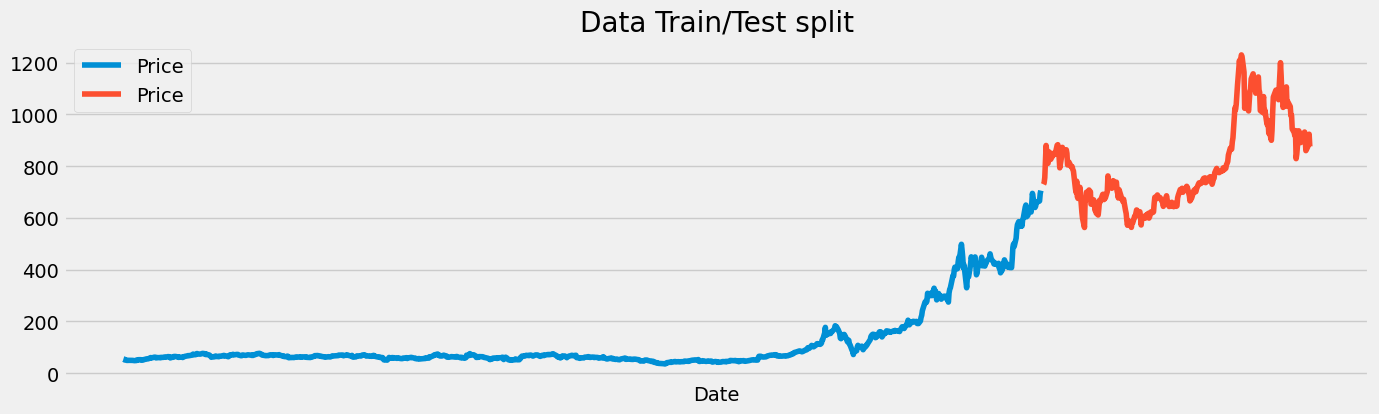

In [6]:
train = df.loc[df.index <= '01-01-2021']
test = df.loc[df.index > '01-01-2021']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2021', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [ ]:
df.loc[(df.index > '01-01-2020') & (df.index < '01-08-2020')].plot(figsize=(15,5), title='Week of Data')
plt.show()

In [7]:

def create_features(df):
  """
  Create time series features based on time series index.
  
  """

  df = df.copy()
  df['hour'] = df.index.hour
  df['day_of_week'] = df.index.dayofweek
  df['quarter'] = df.index.quarter
  df['month'] = df.index.month
  df['year'] = df.index.year
  df['day_of_year'] = df.index.dayofyear
  df['day_of_month'] = df.index.day
  df['week_of_year'] = df.index.isocalendar().week
  return df

df = create_features(df)

In [8]:
df.head()

,Price,hour,day_of_week,quarter,month,year,day_of_year,day_of_month,week_of_year
Date,,,,,,,,,
2017-02-21,55.478001,0,1,1,2,2017,52,21,8
2017-02-22,54.702000,0,2,1,2,2017,53,22,8
2017-02-23,51.198002,0,3,1,2,2017,54,23,8
2017-02-24,51.400002,0,4,1,2,2017,55,24,8
2017-02-27,49.245998,0,0,1,2,2017,58,27,9


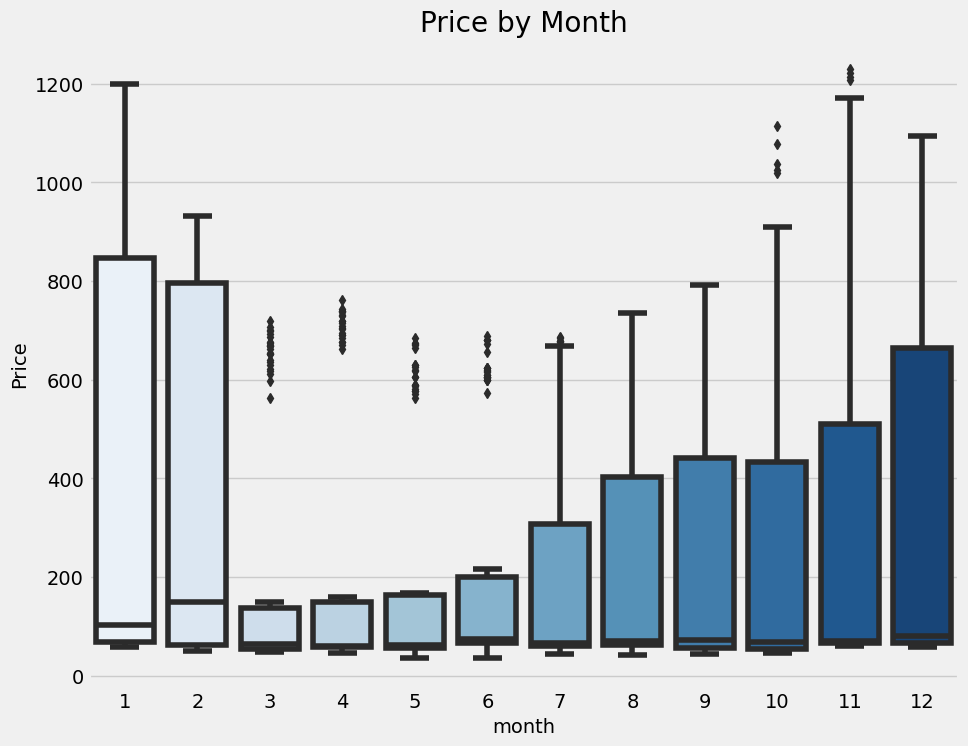

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='Price', palette='Blues')
ax.set_title('Price by Month')
plt.show()

In [10]:
train = create_features(train)
test = create_features(test)

FEATURES = ['day_of_year', 'hour', 'day_of_week', 'quarter', 'month', 'year']
TARGET = 'Price'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [11]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[23:32:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:176.91644	validation_1-rmse:815.58150
[100]	validation_0-rmse:67.81642	validation_1-rmse:647.84697
[200]	validation_0-rmse:27.97374	validation_1-rmse:591.33514
[300]	validation_0-rmse:14.81743	validation_1-rmse:571.19436
[400]	validation_0-rmse:10.80814	validation_1-rmse:563.36921
[500]	validation_0-rmse:9.68524	validation_1-rmse:560.82360
[600]	validation_0-rmse:9.03475	validation_1-rmse:560.10554
[700]	validation_0-rmse:8.67230	validation_1-rmse:559.84965
[800]	validation_0-rmse:8.41145	validation_1-rmse:559.70236
[900]	validation_0-rmse:8.09932	validation_1-rmse:559.64067
[999]	validation_0-rmse:7.80408	validation_1-rmse:559.59982


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

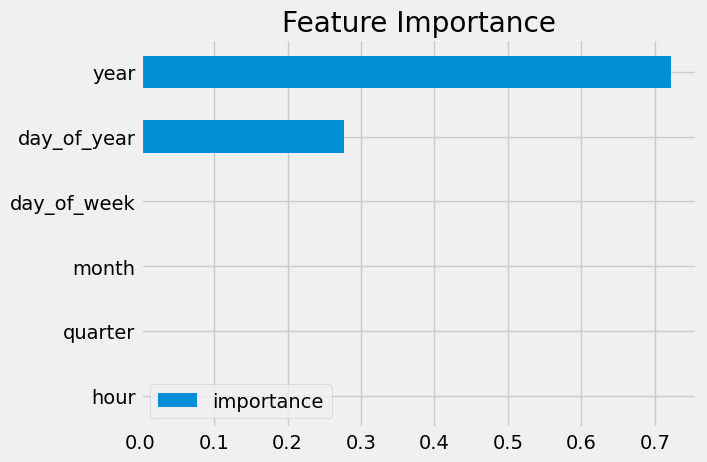

In [12]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=FEATURES,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [13]:
test['prediction'] = reg.predict(X_test)
test.head()

,Price,hour,day_of_week,quarter,month,year,day_of_year,day_of_month,week_of_year,prediction
Date,,,,,,,,,,
2021-01-04,729.770020,0,0,1,1,2021,4,4,1,93.718513
2021-01-05,735.109985,0,1,1,1,2021,5,5,1,93.718513
2021-01-06,755.979980,0,2,1,1,2021,6,6,1,93.649399
2021-01-07,816.039978,0,3,1,1,2021,7,7,1,99.829727
2021-01-08,880.020020,0,4,1,1,2021,8,8,1,101.778931


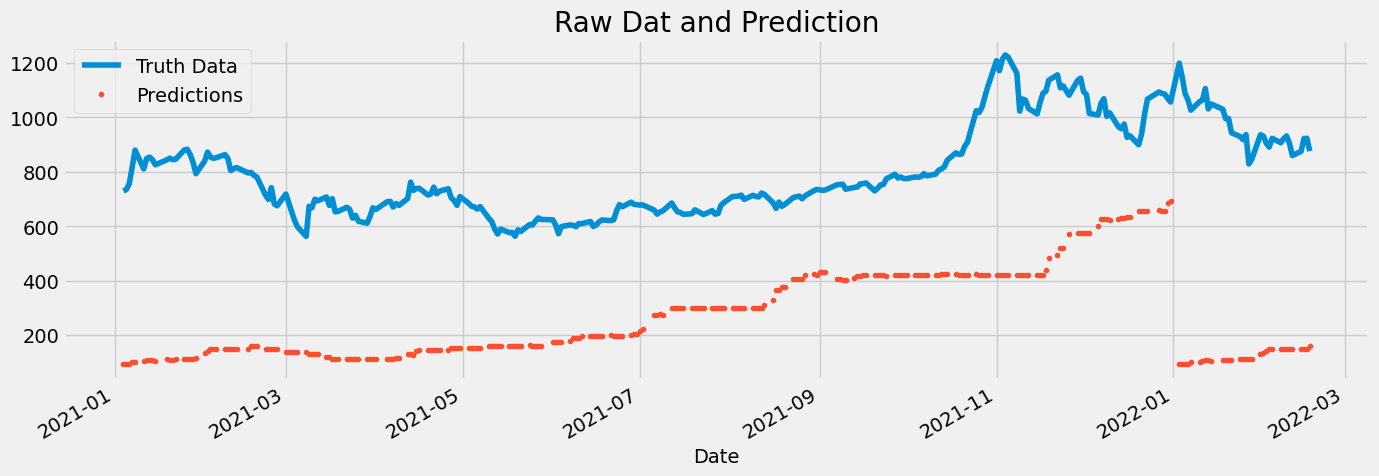

In [14]:
test['prediction'] = reg.predict(X_test)
ax = test[['Price']].plot(figsize=(15, 5))
test['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

In [15]:
score = np.sqrt(mean_squared_error(test['Price'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 559.60


In [16]:
test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)

date
2022-01-03    1106.061516
2022-01-04    1055.871453
2022-01-12     999.253006
2022-01-05     994.470596
2022-01-06     971.050552
2022-01-11     959.810905
2022-01-10     955.982651
2022-01-14     942.932319
2022-01-07     927.419533
2022-01-13     924.593094
Name: error, dtype: float64